In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from scipy import stats

In [3]:
df = pd.read_csv('/content/TWO_CENTURIES_OF_UM_RACES.csv')
df.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0.0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1.0
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2.0
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3.0
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38357 entries, 0 to 38356
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year of event              38357 non-null  int64  
 1   Event dates                38357 non-null  object 
 2   Event name                 38357 non-null  object 
 3   Event distance/length      38357 non-null  object 
 4   Event number of finishers  38357 non-null  int64  
 5   Athlete performance        38357 non-null  object 
 6   Athlete club               21351 non-null  object 
 7   Athlete country            38357 non-null  object 
 8   Athlete year of birth      35101 non-null  float64
 9   Athlete gender             38357 non-null  object 
 10  Athlete age category       35116 non-null  object 
 11  Athlete average speed      38356 non-null  object 
 12  Athlete ID                 38356 non-null  float64
dtypes: float64(2), int64(2), object(9)
memory usag

In [5]:
df.shape

(38357, 13)

In [6]:
df['Year of event'].unique()

array([2018])

\

next step is to clean up the data


working with USA Races, 50km or 50mi


---



---



In [7]:
df[df['Event distance/length'].isin (['50km', '50mi'])]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0.0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1.0
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2.0
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3.0
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38123,2018,03.03.2018,Mesquite Fire 50km (USA),50km,33,8:10:02 h,NaN,USA,1955.0,M,M60,6.122,35791.0
38124,2018,03.03.2018,Mesquite Fire 50km (USA),50km,33,8:12:26 h,NaN,USA,1967.0,M,M50,6.092,95.0
38125,2018,03.03.2018,Mesquite Fire 50km (USA),50km,33,8:12:29 h,NaN,USA,1971.0,M,M45,6.092,35792.0
38126,2018,03.03.2018,Mesquite Fire 50km (USA),50km,33,8:30:38 h,NaN,USA,1980.0,M,M35,5.875,35793.0


In [8]:
df[df['Event name'].str.split('(').str.get(1).str.split(')').str.get(0) == 'USA']

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
55,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,9:53:05 h,"*Middleville, MI",USA,1983.0,M,M23,8.141,55.0
56,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:09:35 h,"*Waterloo, ON",CAN,1977.0,F,W40,7.211,56.0
57,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:33:00 h,"*Kitchener, ON",CAN,1976.0,M,M40,6.967,57.0
58,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:38:17 h,"*Utica, MI",USA,1986.0,M,M23,6.914,58.0
59,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:56:35 h,"*Grass Lake, MI",USA,1988.0,M,M23,6.738,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38123,2018,03.03.2018,Mesquite Fire 50km (USA),50km,33,8:10:02 h,NaN,USA,1955.0,M,M60,6.122,35791.0
38124,2018,03.03.2018,Mesquite Fire 50km (USA),50km,33,8:12:26 h,NaN,USA,1967.0,M,M50,6.092,95.0
38125,2018,03.03.2018,Mesquite Fire 50km (USA),50km,33,8:12:29 h,NaN,USA,1971.0,M,M45,6.092,35792.0
38126,2018,03.03.2018,Mesquite Fire 50km (USA),50km,33,8:30:38 h,NaN,USA,1980.0,M,M35,5.875,35793.0


In [9]:
df2 = df[df['Event distance/length'].isin (['50km', '50mi']) & (df['Event name'].str.split('(').str.get(1).str.split(')').str.get(0) == 'USA')]

In [10]:
df2.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
55,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9.0,9:53:05 h,"*Middleville, MI",USA,1983.0,M,M23,8.141,55.0
56,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9.0,11:09:35 h,"*Waterloo, ON",CAN,1977.0,F,W40,7.211,56.0
57,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9.0,11:33:00 h,"*Kitchener, ON",CAN,1976.0,M,M40,6.967,57.0
58,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9.0,11:38:17 h,"*Utica, MI",USA,1986.0,M,M23,6.914,58.0
59,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9.0,11:56:35 h,"*Grass Lake, MI",USA,1988.0,M,M23,6.738,59.0


clean up the event name(remove USA)

In [10]:
df2['Event name'] = df2['Event name'].str.split('(').str.get(0)
df2.head()

<ipython-input-10-4cc7fd0b16db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Event name'] = df2['Event name'].str.split('(').str.get(0)


,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
55,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,9:53:05 h,"*Middleville, MI",USA,1983.0,M,M23,8.141,55.0
56,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,11:09:35 h,"*Waterloo, ON",CAN,1977.0,F,W40,7.211,56.0
57,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,11:33:00 h,"*Kitchener, ON",CAN,1976.0,M,M40,6.967,57.0
58,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,11:38:17 h,"*Utica, MI",USA,1986.0,M,M23,6.914,58.0
59,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,11:56:35 h,"*Grass Lake, MI",USA,1988.0,M,M23,6.738,59.0


clean the athlete age

In [11]:
df2['athlete_age'] = 2018 - df2['Athlete year of birth']
df2.head()

<ipython-input-11-81b6ce47bf85>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['athlete_age'] = 2018 - df2['Athlete year of birth']


,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,athlete_age
55,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,9:53:05 h,"*Middleville, MI",USA,1983.0,M,M23,8.141,55.0,35.0
56,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,11:09:35 h,"*Waterloo, ON",CAN,1977.0,F,W40,7.211,56.0,41.0
57,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,11:33:00 h,"*Kitchener, ON",CAN,1976.0,M,M40,6.967,57.0,42.0
58,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,11:38:17 h,"*Utica, MI",USA,1986.0,M,M23,6.914,58.0,32.0
59,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,11:56:35 h,"*Grass Lake, MI",USA,1988.0,M,M23,6.738,59.0,30.0


remove the h from athlete performance

In [12]:
 df2['Athlete performance'] = df2['Athlete performance'].str.split(' ').str.get(0)

<ipython-input-12-fe95f03be5db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Athlete performance'] = df2['Athlete performance'].str.split(' ').str.get(0)


In [13]:
df2.head(5)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,athlete_age
55,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,9:53:05,"*Middleville, MI",USA,1983.0,M,M23,8.141,55.0,35.0
56,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,11:09:35,"*Waterloo, ON",CAN,1977.0,F,W40,7.211,56.0,41.0
57,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,11:33:00,"*Kitchener, ON",CAN,1976.0,M,M40,6.967,57.0,42.0
58,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,11:38:17,"*Utica, MI",USA,1986.0,M,M23,6.914,58.0,32.0
59,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,11:56:35,"*Grass Lake, MI",USA,1988.0,M,M23,6.738,59.0,30.0


drops some columns that are not needed (Athlete club, athlete country, athlete year of birth, athlete age category)

In [14]:
df2 = df2.drop(['Athlete club', 'Athlete country', 'Athlete year of birth', 'Athlete age category'], axis=1)

In [15]:
df2.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,athlete_age
55,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,9:53:05,M,8.141,55.0,35.0
56,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,11:09:35,F,7.211,56.0,41.0
57,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,11:33:00,M,6.967,57.0,42.0
58,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,11:38:17,M,6.914,58.0,32.0
59,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,11:56:35,M,6.738,59.0,30.0


Clean up null values

In [16]:
df2.isnull().sum()

Year of event                 0
Event dates                   0
Event name                    0
Event distance/length         0
Event number of finishers     0
Athlete performance           0
Athlete gender                0
Athlete average speed         0
Athlete ID                    0
athlete_age                  25
dtype: int64

In [17]:
df2 = df2.dropna()

In [18]:
df2.shape

(3987, 10)

check for duplicate values

In [19]:
df2[df2.duplicated() == True]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,athlete_age


reset index

In [21]:
df2.reset_index(drop=True, inplace=True)

fixing data types

In [22]:
df2.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete gender                object
Athlete average speed         object
Athlete ID                   float64
athlete_age                  float64
dtype: object

In [23]:
df2['athlete_age'] = df2['athlete_age'].astype(int)

In [24]:
df2['Athlete average speed'] = df2['Athlete average speed'].astype(float)

In [25]:
df2.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete gender                object
Athlete average speed        float64
Athlete ID                   float64
athlete_age                    int64
dtype: object

Renaming columns

In [26]:
df2 = df2.rename(columns={'Year of event':'year',
                            'Event dates':'race_day',
                            'Event name':'race_name',
                            'Event distance/length':'race_length',
                            'Event number of finishers':'race_number_of_finishers',
                            'Athlete performance':'athlete_performance',
                            'Athlete gender':'athlete_gender',
                            'Athlete average speed':'athlete_average_speed',
                             'Athlete ID':'athlete_id'
                            })

In [27]:
df2.head()

,year,race_day,race_name,race_length,race_number_of_finishers,athlete_performance,athlete_gender,athlete_average_speed,athlete_id,athlete_age
0,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,9:53:05,M,8.141,55.0,35
1,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,11:09:35,F,7.211,56.0,41
2,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,11:33:00,M,6.967,57.0,42
3,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,11:38:17,M,6.914,58.0,32
4,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,11:56:35,M,6.738,59.0,30


re-ordering of columns

In [28]:
df3 = df2[['race_day', 'race_name', 'race_length', 'race_number_of_finishers', 'athlete_performance', 'athlete_gender', 'athlete_average_speed', 'athlete_age', 'athlete_id']]

In [29]:
df3.head()

,race_day,race_name,race_length,race_number_of_finishers,athlete_performance,athlete_gender,athlete_average_speed,athlete_age,athlete_id
0,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,9:53:05,M,8.141,35,55.0
1,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,11:09:35,F,7.211,41,56.0
2,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,11:33:00,M,6.967,42,57.0
3,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,11:38:17,M,6.914,32,58.0
4,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,11:56:35,M,6.738,30,59.0


charts and graphs

<Axes: xlabel='race_length', ylabel='Count'>

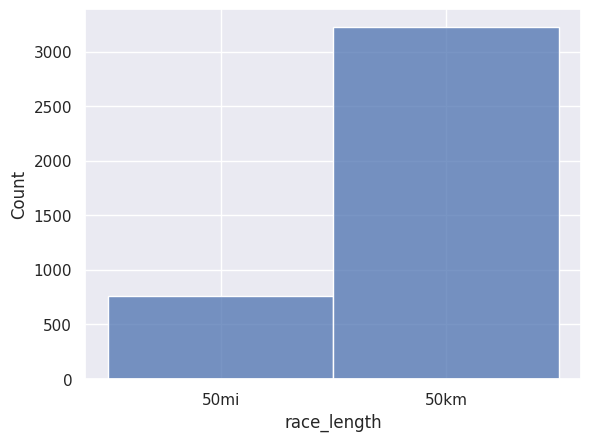

In [30]:
sns.histplot(df3['race_length'])

<Axes: xlabel='race_length', ylabel='Count'>

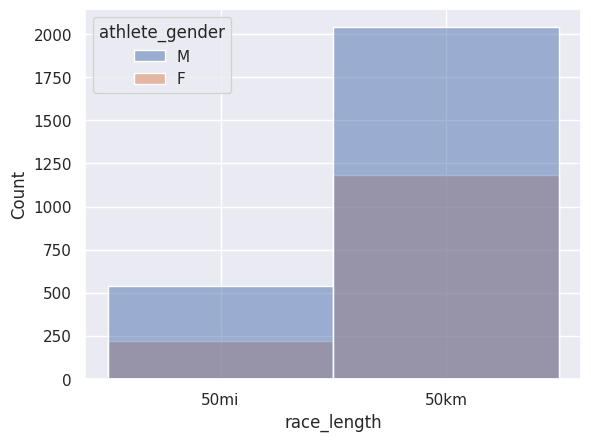

In [31]:
sns.histplot(df3, x = 'race_length', hue='athlete_gender')

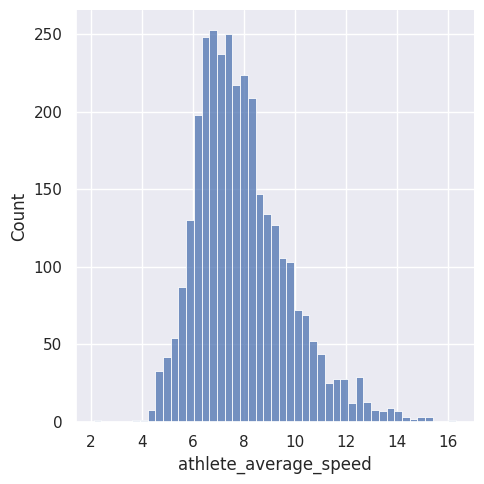

In [32]:
sns.displot(df3[df3['race_length'] =='50km']['athlete_average_speed'])

<Axes: xlabel='race_length', ylabel='athlete_average_speed'>

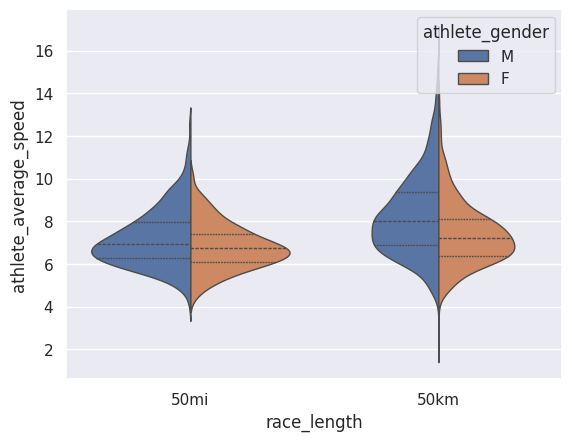

In [33]:
sns.violinplot(data = df3, x='race_length', y='athlete_average_speed', hue='athlete_gender', split= True, inner = 'quart', linewidth= 1)

<Axes: xlabel='race_length', ylabel='athlete_average_speed'>

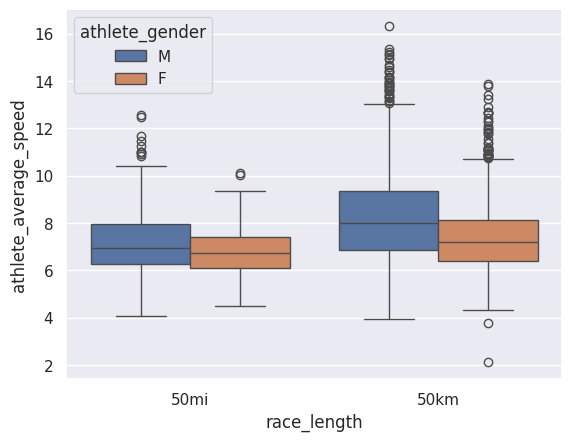

In [34]:
sns.boxplot(data = df3, x='race_length', y='athlete_average_speed', hue='athlete_gender')

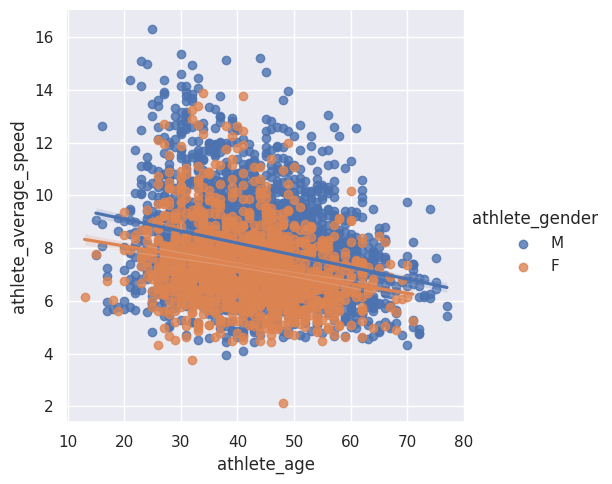

In [35]:
sns.lmplot(data = df3, x='athlete_age', y='athlete_average_speed', hue='athlete_gender')

questions i want to find out from the data
1. Difference in speed for both race_length(50mi, 50km) male to female

In [36]:
df3.groupby(['race_length', 'athlete_gender'], as_index=False)['athlete_average_speed'].mean()

,race_length,athlete_gender,athlete_average_speed
0,50km,F,7.404393
1,50km,M,8.256492
2,50mi,F,6.809968
3,50mi,M,7.200188


2. what age groups are the best in the 50m race(20+ races min)

In [37]:
df3.query('race_length == "50mi"').groupby('athlete_age')['athlete_average_speed'].agg(['mean','count']).sort_values('mean', ascending=False).query('count>19')

,mean,count
athlete_age,,
35,7.548222,27
34,7.463966,29
41,7.429944,36
50,7.367741,27
38,7.322115,26
43,7.245391,23
36,7.208974,38
45,7.116524,21
37,7.034059,34


3. what age groups are the worst in the 50m race(20+ races min)

In [40]:
df3.query('race_length == "50mi"').groupby('athlete_age')['athlete_average_speed'].agg(['mean','count']).sort_values('mean', ascending=True).query('count>19')

,mean,count
athlete_age,,
47,6.775600,20
48,6.793033,30
46,6.832034,29
42,6.916621,29
39,6.946000,29
44,7.020524,21
32,7.020682,22
37,7.034059,34
45,7.116524,21


4. seasons for the data -> slower in summer than winter?

In [41]:
df3['race_month'] = df3['race_day'].str.split('.').str.get(1).astype(int)

In [43]:
df3['race_season'] = df3['race_month'].apply(lambda x: 'winter' if x > 11 else 'fall' if x > 8 else 'summer' if x > 5 else 'spring' if x > 2 else 'winter')

In [47]:
df3.groupby('race_season')['athlete_average_speed'].agg(['mean', 'count']).sort_values('mean',ascending=False)

,mean,count
race_season,,
spring,7.808821,3853
winter,6.952313,134
